In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
cluster1=np.random.uniform(0.5,2.5,(2,10))
cluster2=np.random.uniform(2.5,4.5,(2,10))
X=np.hstack((cluster1,cluster2)).T

In [3]:
X

array([[1.00681549, 0.74483302],
       [1.44304597, 1.83561332],
       [0.79436149, 1.0037644 ],
       [1.15269277, 1.1721895 ],
       [1.84296828, 1.17326919],
       [0.87236251, 0.60483207],
       [1.67047158, 1.99763273],
       [2.29698176, 0.93491276],
       [1.370944  , 1.58329709],
       [1.03130974, 1.26598834],
       [3.6185496 , 3.03511649],
       [2.86403064, 4.32473944],
       [3.72934146, 2.77777268],
       [2.57924087, 3.71933406],
       [3.90912181, 4.29585478],
       [2.56013925, 2.5525933 ],
       [4.2321856 , 2.68972156],
       [3.61697884, 2.64512575],
       [3.75544251, 2.81969982],
       [3.5532845 , 2.97424619]])

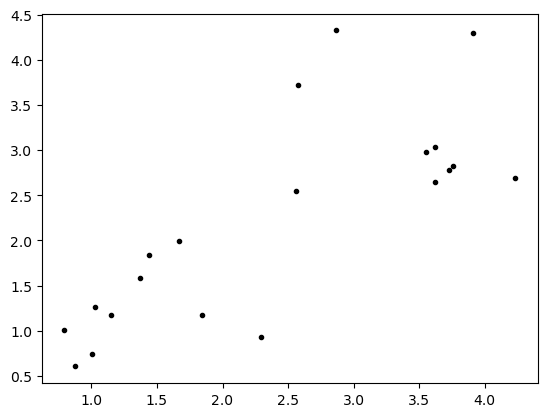

In [4]:
plt.plot(X[:,0],X[:,1],'k.')
kmeans_k2=KMeans(n_clusters=2)

In [5]:
kmeans_k2.fit(X)

KMeans(n_clusters=2)

In [6]:
kmeans_k2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
kmeans_k2.cluster_centers_

array([[1.34819536, 1.23163324],
       [3.44183151, 3.18342041]])

In [8]:
cluster_centers = kmeans_k2.cluster_centers_

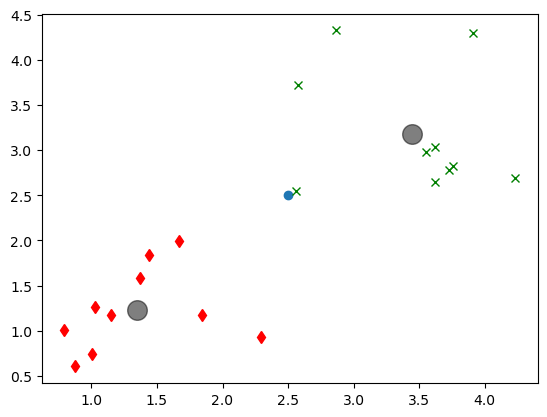

In [9]:
colors = ['rd','gx','c+','y*','b^','m>']

labels = kmeans_k2.labels_

for i in range(len(X)):
     plt.plot(X[i][0],X[i][1],colors[labels[i]])

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)  
plt.scatter(2.5,2.5)
plt.show()

In [10]:
#預測新資料所屬類別
kmeans_k2.predict([[2.5,2.5]])

array([1])

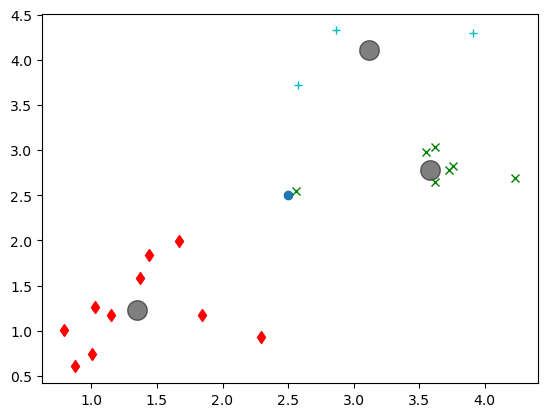

In [11]:
kmeans_k3=KMeans(n_clusters=3)
kmeans_k3.fit(X)
cluster_centers = kmeans_k3.cluster_centers_
labels = kmeans_k3.labels_
for i in range(len(X)):
     plt.plot(X[i][0],X[i][1],colors[labels[i]])

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)   
plt.scatter(2.5,2.5)
plt.show()       

In [12]:
kmeans_k3.predict([[2.5,2.5]])

array([1])

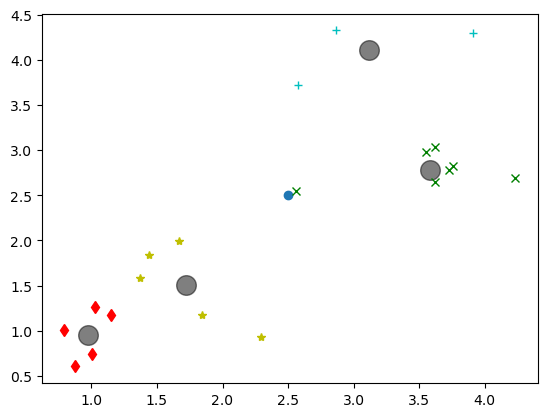

In [13]:
kmeans_k4=KMeans(n_clusters=4)
kmeans_k4.fit(X)
cluster_centers = kmeans_k4.cluster_centers_
labels = kmeans_k4.labels_
for i in range(len(X)):
     plt.plot(X[i][0],X[i][1],colors[labels[i]])

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)   
plt.scatter(2.5,2.5)
plt.show()   

In [14]:
kmeans_k4.predict([[2.5,2.5]])

array([1])

[1.5294396125329959, 0.6659603395587397, 0.5110306191081946, 0.4121240440536534, 0.3449670985683622, 0.2767191707605259, 0.2196970250953672, 0.19415059319463968, 0.16242500841764682]


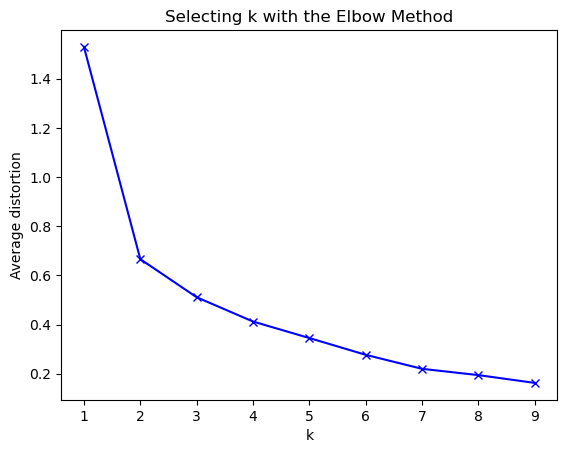

In [15]:
from scipy.spatial.distance import cdist
K=range(1,10)
meandistortions=[]
for k in K:    
    kmeans=KMeans(n_clusters=k)    
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

print(meandistortions)    
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [16]:
import pandas as pd
meandist_series = pd.Series(meandistortions)
print(meandist_series)
print(meandist_series.diff(-1))

0    1.529440
1    0.665960
2    0.511031
3    0.412124
4    0.344967
5    0.276719
6    0.219697
7    0.194151
8    0.162425
dtype: float64
0    0.863479
1    0.154930
2    0.098907
3    0.067157
4    0.068248
5    0.057022
6    0.025546
7    0.031726
8         NaN
dtype: float64


In [17]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [18]:
import pandas as pd
iris = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                    columns= iris_dataset['feature_names'] + ['target'])

In [19]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [20]:
iris_k3 = KMeans(n_clusters=3)
iris_k3.fit(iris[['petal length (cm)','petal width (cm)']])
iris_k3_pred = iris_k3.predict(iris[['petal length (cm)','petal width (cm)']])

In [21]:
iris['target'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [22]:
iris_k3_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 請注意KMean所預測的標籤可能與原始標籤不相同,請注意

In [23]:
setosa = iris[iris['target']==0]
versicolor = iris[iris['target']==1]
virginica = iris[iris['target']==2]

#請注意每次KMean所預測的標籤可能與原始標籤順序不相同,所以下面程式碼可能需要變更
setosa_pred = iris[iris_k3_pred==1]
versicolor_pred = iris[iris_k3_pred==2]
virginica_pred = iris[iris_k3_pred==0]

In [24]:
cluster_centers = iris_k3.cluster_centers_
labels = iris_k3.labels_

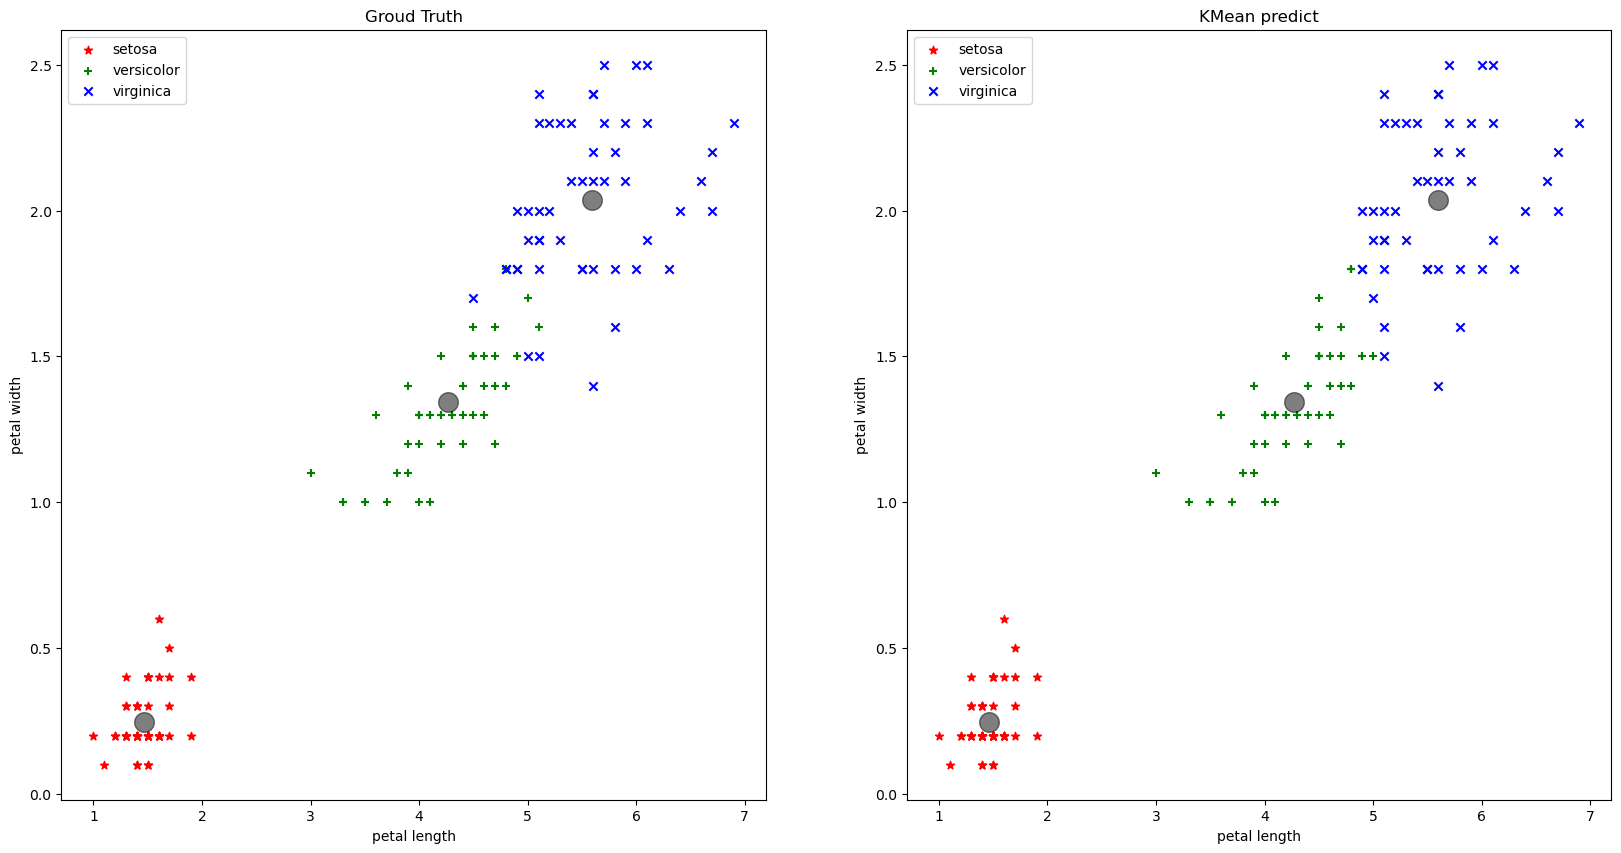

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],color='red',marker='*',label='setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],color='green',marker='+',label='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],color='blue',marker='x',label='virginica')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)           
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Groud Truth')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(setosa_pred['petal length (cm)'],setosa_pred['petal width (cm)'],color='red',marker='*',label='setosa')
plt.scatter(versicolor_pred['petal length (cm)'],versicolor_pred['petal width (cm)'],color='green',marker='+',label='versicolor')
plt.scatter(virginica_pred['petal length (cm)'],virginica_pred['petal width (cm)'],color='blue',marker='x',label='virginica')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)           
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KMean predict')
plt.legend()

plt.show()

In [26]:
iris_4f_k3 = KMeans(n_clusters=3)
iris_4f_k3.fit(iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
iris_4f_k3_pred = iris_4f_k3.predict(iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
iris_4f_k3_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
setosa = iris[iris['target']==0]
versicolor = iris[iris['target']==1]
virginica = iris[iris['target']==2]
setosa_pred = iris[iris_4f_k3_pred==1]
versicolor_pred = iris[iris_4f_k3_pred==2]
virginica_pred = iris[iris_4f_k3_pred==0]

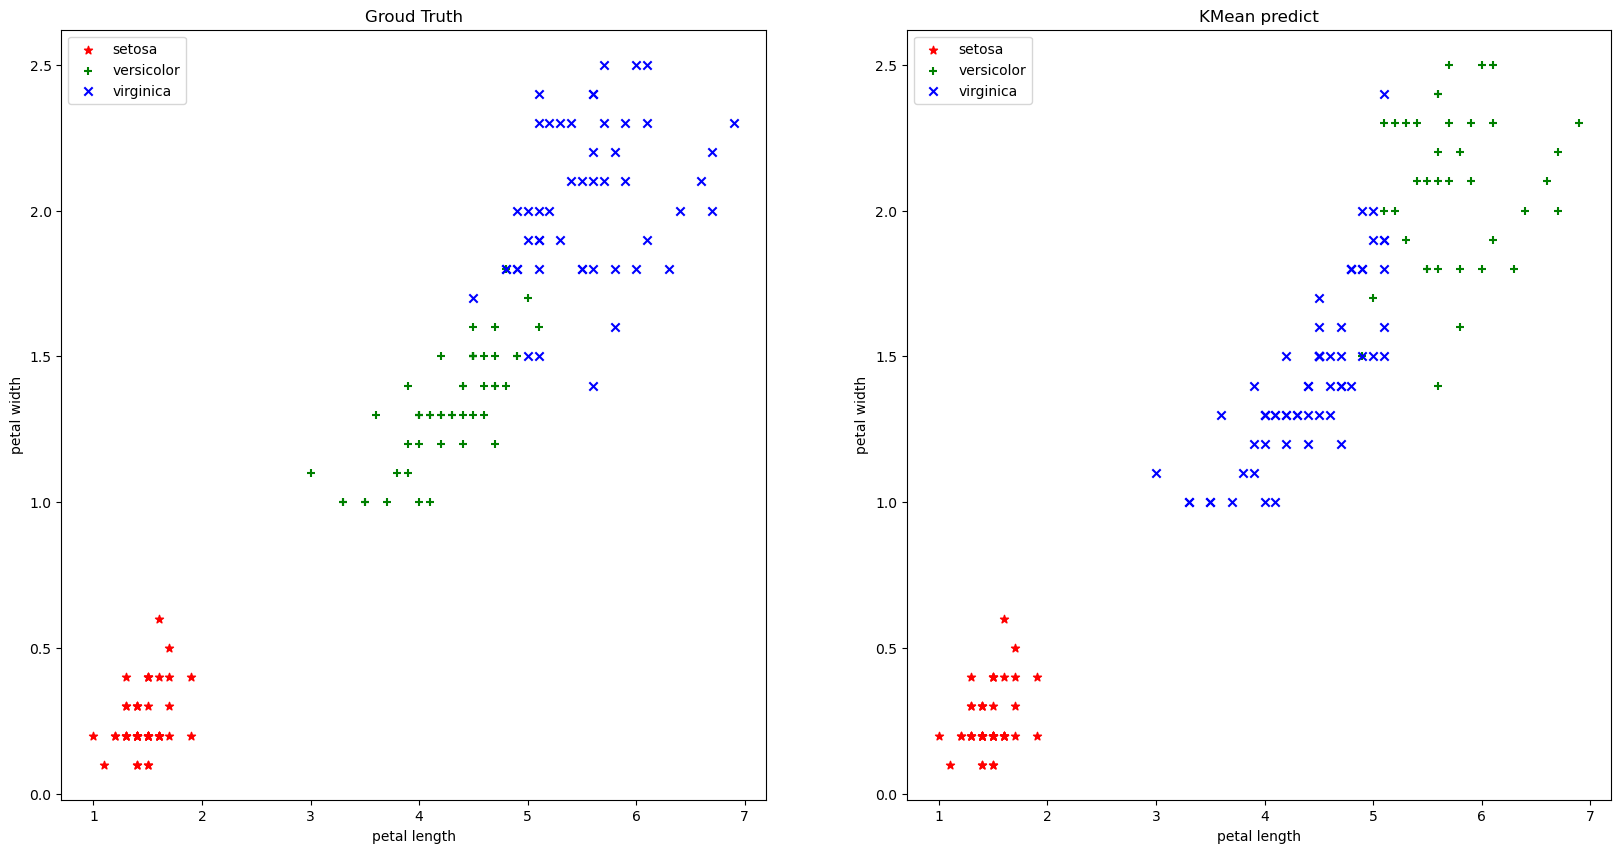

In [28]:
cluster_centers = iris_4f_k3.cluster_centers_
labels = iris_4f_k3.labels_
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],color='red',marker='*',label='setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],color='green',marker='+',label='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],color='blue',marker='x',label='virginica')
#plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)           
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Groud Truth')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(setosa_pred['petal length (cm)'],setosa_pred['petal width (cm)'],color='red',marker='*',label='setosa')
plt.scatter(versicolor_pred['petal length (cm)'],versicolor_pred['petal width (cm)'],color='green',marker='+',label='versicolor')
plt.scatter(virginica_pred['petal length (cm)'],virginica_pred['petal width (cm)'],color='blue',marker='x',label='virginica')
#plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)           
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KMean predict')
plt.legend()

plt.show()

In [29]:
from sklearn.decomposition import PCA

#使用PCA降維,將原本一個樣本有4個特徵,轉換為2個新特徵(新特徵與原本特徵有關聯)
iris_pca2 = PCA(n_components=2).fit_transform(iris.iloc[:,:4])

iris_pca2_k3 = KMeans(n_clusters=3)
iris_pca2_k3.fit(iris_pca2)
iris_pca2_k3_pred = iris_pca2_k3.predict(iris_pca2)

cluster_centers = iris_pca2_k3.cluster_centers_
labels = iris_pca2_k3.labels_

In [30]:
print(iris['target'].values)
print(iris_pca2_k3_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [31]:
setosa_pca2 = iris_pca2[iris['target']==0]
versicolor_pca2 = iris_pca2[iris['target']==1]
virginica_pca2 = iris_pca2[iris['target']==2]

setosa_pca2_pred = iris_pca2[iris_pca2_k3_pred==1]
versicolor_pca2_pred = iris_pca2[iris_pca2_k3_pred==0]
virginica_pca2_pred = iris_pca2[iris_pca2_k3_pred==2]

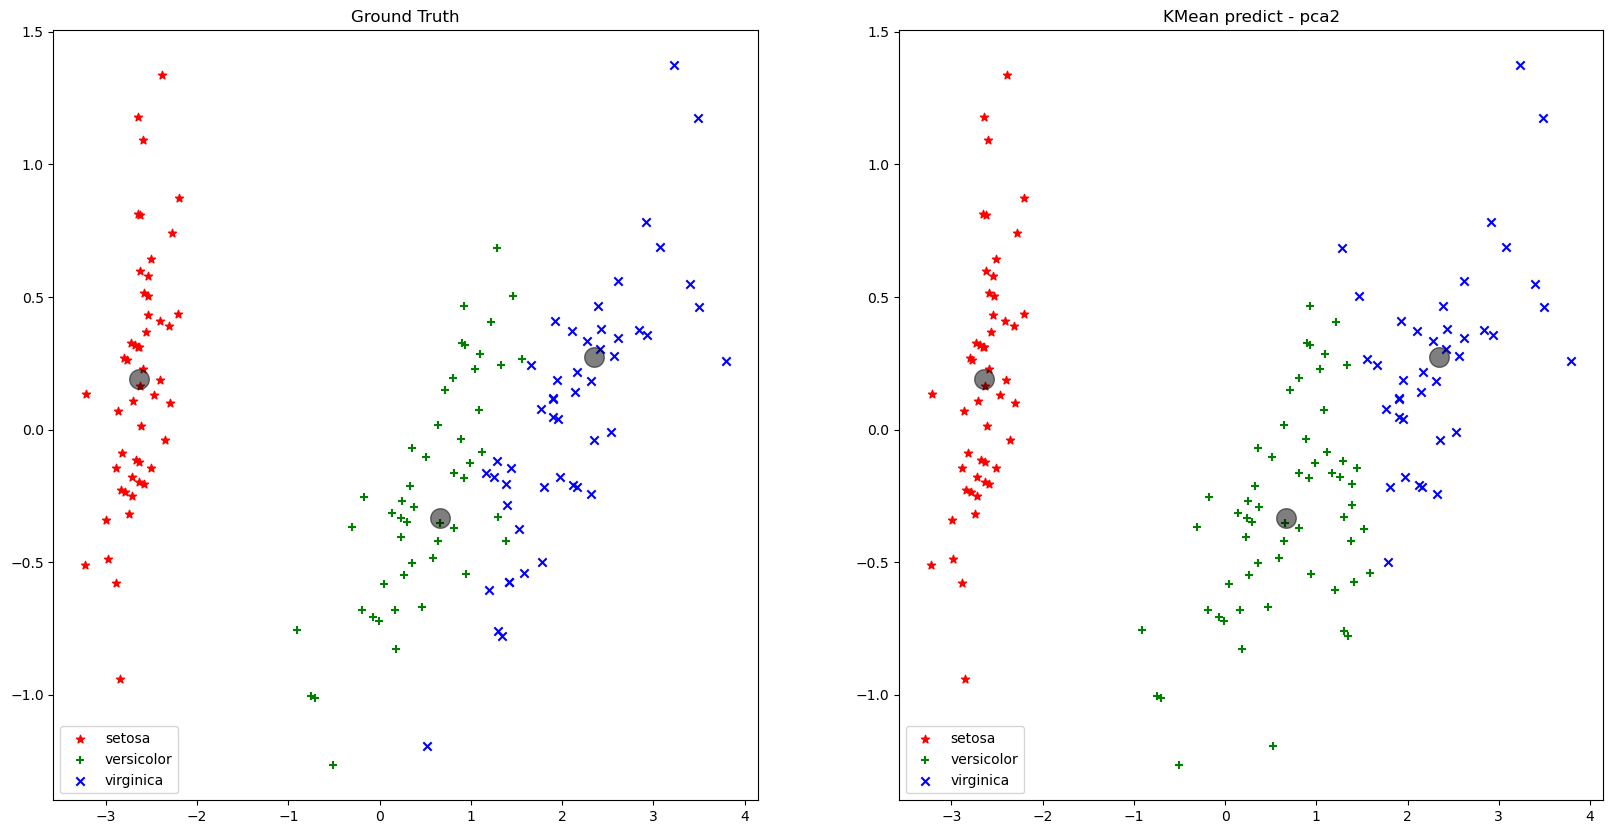

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(setosa_pca2[:,0],setosa_pca2[:,1],color='red',marker='*',label='setosa')
plt.scatter(versicolor_pca2[:,0],versicolor_pca2[:,1],color='green',marker='+',label='versicolor')
plt.scatter(virginica_pca2[:,0],virginica_pca2[:,1],color='blue',marker='x',label='virginica')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)           
plt.legend()
plt.title('Ground Truth')

plt.subplot(1,2,2)
plt.scatter(setosa_pca2_pred[:,0],setosa_pca2_pred[:,1],color='red',marker='*',label='setosa')
plt.scatter(versicolor_pca2_pred[:,0],versicolor_pca2_pred[:,1],color='green',marker='+',label='versicolor')
plt.scatter(virginica_pca2_pred[:,0],virginica_pca2_pred[:,1],color='blue',marker='x',label='virginica')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)           
plt.legend()
plt.title('KMean predict - pca2')

plt.show()